# Boston Housing 

**What data are we exploring today?**

Boston_housing.csv is modfied data for "Statstics for Data Science with Pyhton" course on Coursera. The complete dataset can be found in the [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) library. To give a piece of brief information about the data set this data contains 506 rows and 13 columns to be precise which contains features such as CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, MEDV
for more information please refer to Data Description text file.

**What are we going to do?**

In this Notebook we are going to perform hypothesis testing using T-test for independent samples, ANOVA, Pearson Correlation and perform Regression analysis.

1. Is there a significant difference in the median value of houses bounded by the Charles river or not? (T- test for independent samples)

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)





In [7]:
# Importing relevant libararies  

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [8]:
# Loading data into dataFrame

boston_df = pd.read_csv('boston_housing.csv')

In [9]:
boston_df.shape      #To display dimension of the Data Frame 

(506, 14)

In [10]:
boston_df.head()     #To display top five rows

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Step 1. Generate Descriptive Statistics and Visualization

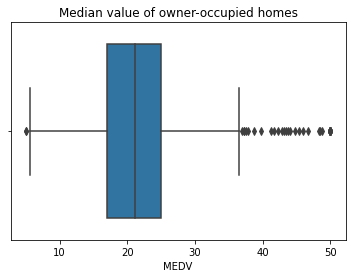

In [7]:
ax = sns.boxplot(x="MEDV", data=boston_df).set_title("Median value of owner-occupied homes")

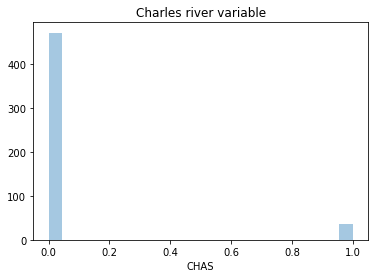

In [11]:
ax = sns.distplot(boston_df['CHAS'], kde = False).set_title("Charles river variable")

In [17]:
# Creating new column "age_group" to group three different ranges of age 
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = "70 years and older"
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


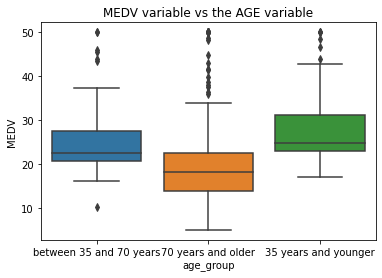

In [19]:
ax = sns.boxplot(y="MEDV", x="age_group", data=boston_df).set_title("MEDV variable vs the AGE variable")

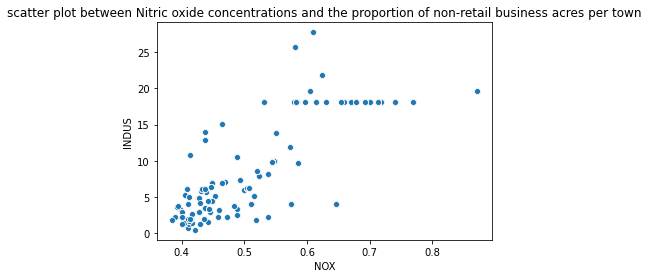

In [20]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df).set_title("scatter plot between Nitric oxide concentrations and the proportion of non-retail business acres per town")

Form this scatterplot we can see it has positive linear relationship between NOX and INDUS

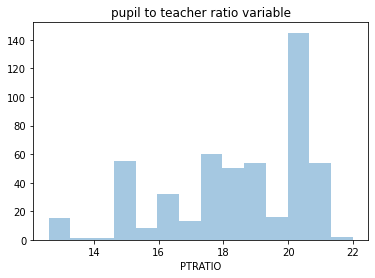

In [21]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False).set_title("pupil to teacher ratio variable")

### Step 2. Hypothesis testing

In [23]:
boston_df['CHAS'].median()

0.0

### T-test 
Null Hypothesis: There is significant difference in the median values of homes bounded by the Charles River

Alternate Hypothesis: There is no difference in median values of homes bounded by the Charles River

In [40]:
scipy.stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 1],
                boston_df['MEDV'][boston_df['CHAS'] == 0])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is no significant evidence There is significant difference in the median values of homes bounded by the Charles River

### ANOVA
Null Hypothesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

Alternate Hypothesis: There is not a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 

In [38]:
scipy.stats.levene(boston_df[boston_df['age_group'] == "35 years and younger"]['MEDV'],
                  boston_df[boston_df['age_group'] == "between 35 and 70 years"]['MEDV'],
                  boston_df[boston_df['age_group'] == "70 years and older"]['MEDV'],
                  center='median')

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [32]:
thirty_five_medv = boston_df[boston_df['age_group'] == "35 years and younger"]['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['age_group'] == "between 35 and 70 years"]['MEDV']
seventy_medv = boston_df[boston_df['age_group'] == "70 years and older"]['MEDV']

In [33]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_medv, thirtyfive_seventy_medv, seventy_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion:  Since the p-value is less than 0.05, we reject the null hypothesis as there is no significant evidence there is a difference Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

### Pearson Correlation

H0 = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1 = There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [34]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### Regression analysis

H0 = B1 = 0 (Additional weighted distance to the five Boston employment centres has impact on the median value of owner occupied homes)

H1 = B1 is not equal to 0 (Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes)

In [35]:
import statsmodels.api as sm

In [36]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        04:47:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the p-value is less than the alpha level = 0.05, so we reject the null hypothesis as there is evidence that Additional weighted distance to the five Boston employment centres has impact on the median value of owner occupied homes